# Elementary cellular automata 

The simplest class of one-dimensional cellular automata, the elementary cellular automata, have two possible values for each cell (0 or 1), and rules that depend only on nearest neighbor values. 

![](https://natureofcode.com/book/imgs/chapter07/ch07_03.png)

As a result, the evolution of an elementary cellular automaton can completely be described by a table specifying the state a given cell will have in the next generation based on the value of the cell to its left, the value the cell itself, and the value of the cell to its right. 

![](https://natureofcode.com/book/imgs/chapter07/ch07_04.png)

Since there are $2\times2\times2=2^3=8$ possible binary states for the three cells neighboring a given cell, there are a total of $2^8=256$ elementary cellular automata, each of which can be indexed with an 8-bit binary number (Wolfram 1983, 2002). 

For example, the table giving the evolution of rule 90 is illustrated below. In this diagram, the possible values of the three neighboring cells are shown in the top row of each panel, and the resulting value the central cell takes in the next generation is shown below. 

![](https://natureofcode.com/book/imgs/chapter07/ch07_11.png)

Generations of the elementary cellular automata for rule 90 is:

![](https://natureofcode.com/book/imgs/chapter07/ch07_12.png)

- **Note:** mind on how you start the automata (initial state), and what to do with the borders.

### Resources

- https://mathworld.wolfram.com/ElementaryCellularAutomaton.html
- https://natureofcode.com/book/chapter-7-cellular-automata/
- https://en.wikipedia.org/wiki/Rule_184

## Implement an elementary cellular autamata:

![](https://mathworld.wolfram.com/images/eps-gif/ElementaryCA_850.gif)

### Trabajo Autónomo:

1. Cuando el CA llegue a la parte inferior de la ventana de procesamiento, el CA comienza de nuevo con un nuevo conjunto de reglas al azar (Opcional). 
2. Examine lo que ocurre si se inicializa la primera generación, con cada célula en un estado aleatorio $(P(Cell_i=1)=p)$, try differente values of $p\in\{0.1, 0.2, 0,3, 0.5, 0.7, 0.8, 0.9\})$.
3. Visualice el CA de una manera no tradicional. Rompa todas las reglas que pueda; no se sienta atado a la utilización de los lugares en una cuadrícula perfecta con blanco y negro (Opcional).
4. Crear una visualización del CA que se desplaza hacia arriba, con el aumento generaciones, para que pueda ver las generaciones de forma "infinita". Sugerencia: en lugar de hacer el seguimiento de sólo una generación a la vez, tendrá que almacenar un historial de las generaciones, siempre añadiendo una nueva y eliminar la más antigua de cada fotograma (Opcional).
5. Cierre los bordes del autómata celular.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

In [ ]:
bin(30)[2:].rjust(8, '0')[::-1]

'01111000'

In [ ]:
def rule_2_bin(rule):
    return bin(rule)[2:].rjust(8, '0')[::-1]

rule = 90

binary_rule = rule_2_bin(rule)
binary_rule

'01011010'

In [ ]:
# Wolfram initialization
size = 11

CA = [np.zeros(size, dtype='int')]

CA[0][size//2] = 1

CA

[array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])]

In [ ]:
cell_i = 5

int(''.join(CA[-1][cell_i-1:cell_i+2].astype('str')), 2)

2

In [ ]:
cell_i = 5

index = int(''.join(CA[-1][cell_i-1:cell_i+2].astype('str')), 2)
int(binary_rule[index])

0

In [ ]:
bernoulli.rvs(p=0.5, size=size)

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1])

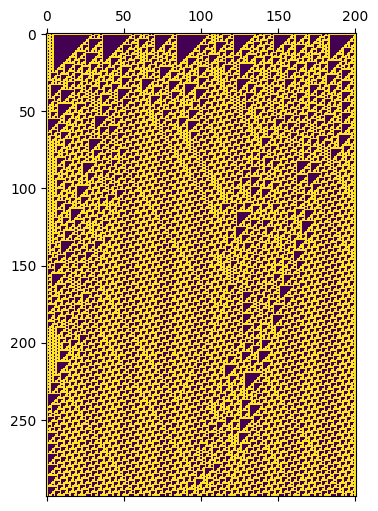

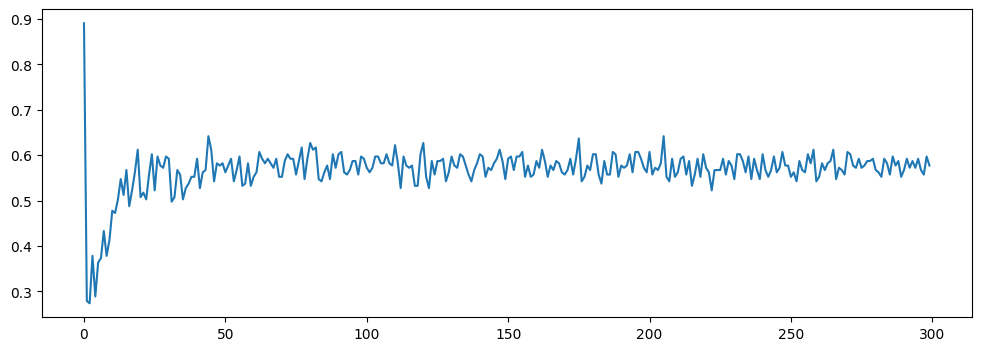

In [ ]:
def rule_2_bin(rule):
    return bin(rule)[2:].rjust(8, '0')[::-1]

rule = 110  # try 184

binary_rule = rule_2_bin(rule)

size = 201

#CA = [np.zeros(size, dtype='int')]

#CA[0][size//2] = 1  # initialization

CA = [bernoulli.rvs(p=0.9, size=size)]  # aleatoria

time = 300

for t in range(time-1):
    CA += [
        np.array([CA[0][-1]] +
            [binary_rule[
                int(''.join(
                    CA[-1][
                        cell_i-1:cell_i+2].astype('str')), 2)] 
                        for cell_i in range(
                            1, size-1)] + [
                                CA[-1][-1]]).astype('int')
    ]
plt.matshow(CA)
plt.show()
plt.figure(figsize=(12,4))
plt.plot(np.array(CA).mean(axis=1))

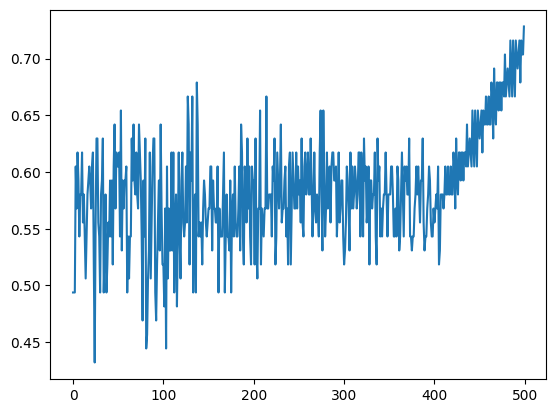

In [ ]:
plt.plot(np.array(CA).mean(axis=1))

### Graphs

A mathematical graph is a set of nodes and edges. The nodes (also called vertices or objects) are connected together by the edges (also called links or connections or arrows or arcs). For any graph we need to know two things:

1. Set of nodes in the graph
2. Set of edges from each node

- Grid graphs
A grid can be viewed as a special case of a graph.

![](https://mathworld.wolfram.com/images/eps-svg/GridGraph_701.svg)

See: 
- https://www.redblobgames.com/pathfinding/grids/graphs.html
- https://mathworld.wolfram.com/GridGraph.html

### Conway's game of life

Conway's Game of Life is a cellular automaton devised by the British mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined solely by its initial state, with no further input required. Despite its simplicity, the Game of Life exhibits complex and unpredictable behavior.

A cellular automaton is a mathematical model or a computational system composed of a grid of cells, each of which can exist in a finite number of states. 

### Substrate:

Conway's Game is played on a grid of cells, which can be thought of as a two-dimensional universe. The cells in the grid, have a Moore neighborhood with radius $r=1$. That is, each cell $k$ has 8 neighbors as follows: 

<img src="https://www.researchgate.net/profile/Gianluigi-Folino/publication/225181504/figure/fig2/AS:669129157668866@1536544231545/the-cGP-grid-and-the-Moore-neighborhood.ppm"  width="40%">

- Von Neumann vs Moore
![](http://www.jcasim.de/main/img14.gif)

### Evolution (dynamics):

The behavior of the entire system evolves over time based on a set of predefined rules that govern the interactions between neighboring cells.

Each cell can be in one of two states: alive or dead, according to the following rules:

1. A live cell with fewer than two live neighbors dies.
2. A live cell with exactly two or three live neighbors lives.
3. A live cell with more than three live neighbors also dies.
4. A dead cell with exactly three live neighbors becomes alive.

<img src="https://www.researchgate.net/publication/339605473/figure/fig5/AS:869062565437443@1584212070801/Rules-of-Conways-Game-of-Life.png"  width="40%">

- Paralell update: The synchronous scheme - all cells are updated in parallel at each time step. This is the conventional model.
  - Check: https://en.wikipedia.org/wiki/Asynchronous_cellular_automaton

- Initialization ($t=0$): random initialization with $P(X=1) = p$.

  - http://www.scholarpedia.org/article/Game_of_Life
  - https://ocw.mit.edu/courses/6-087-practical-programming-in-c-january-iap-2010/86f222c2f2558ba9559771ed913513f5_MIT6_087IAP10_lab01.pdf
  - https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-087-practical-programming-in-c-january-iap-2010/labs/MIT6_087IAP10_lab01.pdf
  - https://www.uu.nl/sites/default/files/hanson.pdf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import bernoulli

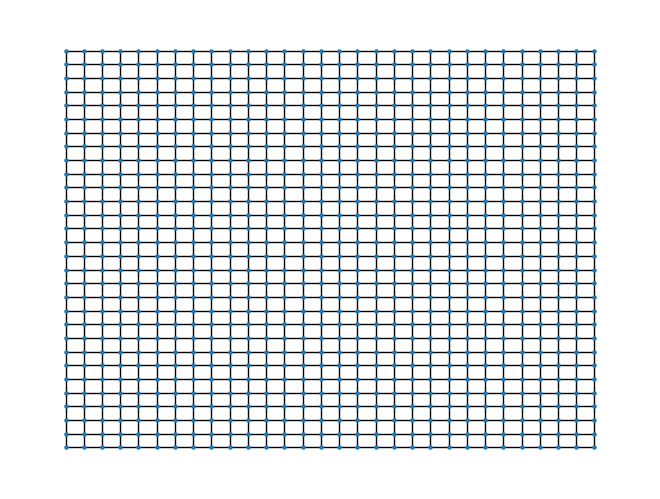

In [ ]:
grid_size = 30

G = nx.grid_2d_graph(grid_size, grid_size)

pos = {(x,y): (x, y) for x,y in G.nodes()}

nx.draw(G, pos=pos, with_labels=False, node_size=5)

In [ ]:
node = (4, 2)
neighbors = np.array(list(G.neighbors(node)))
neighbors

array([[3, 2],
       [5, 2],
       [4, 1],
       [4, 3]])

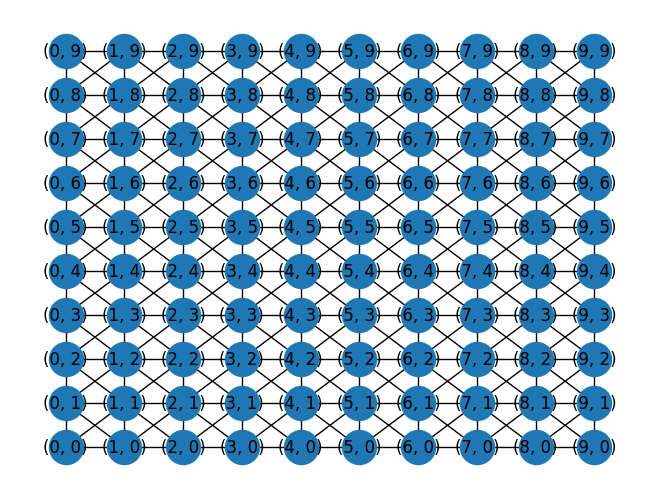

In [ ]:
# Cell automata structure: live in a grid
# Each cell with its kneigborhood
# A grid is regular graph
grid_size = 10

G = nx.grid_2d_graph(grid_size, grid_size)

pos = {(x,y): (x, y) for x,y in G.nodes()}

G.add_edges_from(
    [((x,y), (x+1, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)] + 
    [((x+1,y), (x, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)]
)

nx.draw(G, pos=pos, with_labels=True, node_size=600)

In [ ]:
#states = np.zeros((grid_size, grid_size), dtype='int')
# Start with p*grid_size*grid_size of cells alive (in average)
p = 0.2
states = bernoulli.rvs(p, size=(grid_size, grid_size))
states

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [ ]:
node = (3, 5)
neighbors = np.array(list(G.neighbors(node)))
states[node], states[neighbors[:,0], neighbors[:,1]], states[neighbors[:,0], neighbors[:,1]].sum()

(0, array([0, 1, 1, 0, 0, 0, 0, 1]), 3)

In [ ]:
# activity is the number of live neighbors
activity = states[neighbors[:,0], neighbors[:,1]].sum()
# Cell is alive (is 1)
if states[node]:
    # Isolation and dies
    if activity < 2:
        states[node] = 0
    # Overpopulation and dies
    if activity > 3:
        states[node] = 0
else:  # Cell is dead
    # Get born
    if activity == 3:
        states[node] = 1
states[node]

1

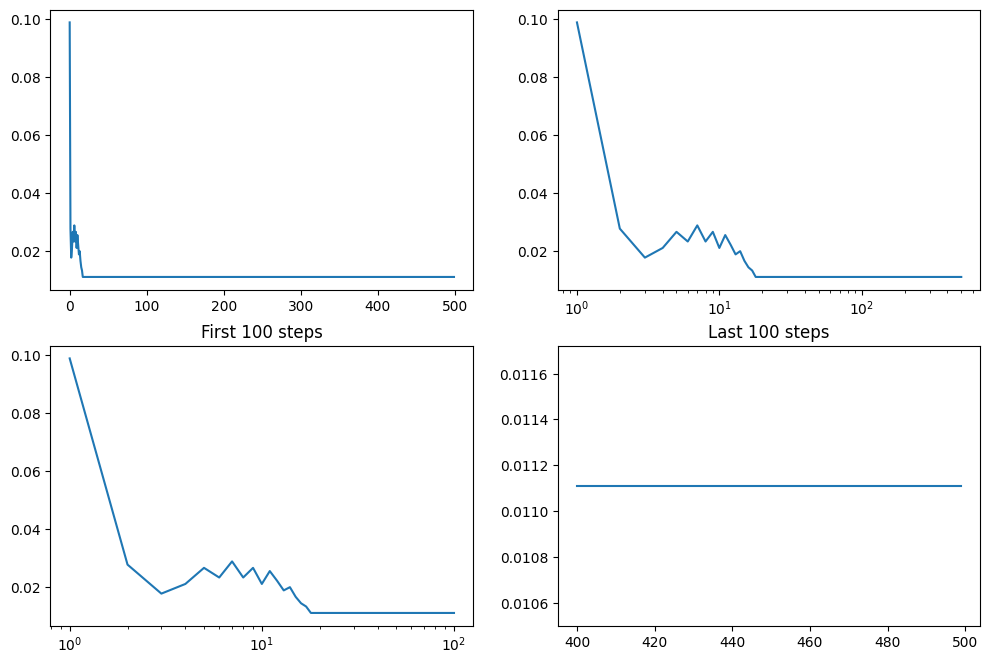

In [ ]:
grid_size = 30

G = nx.grid_2d_graph(grid_size, grid_size)

pos = {(x,y): (x, y) for x,y in G.nodes()}

G.add_edges_from(
    [((x,y), (x+1, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)] + 
    [((x+1,y), (x, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)]
)

p = 0.1

states = bernoulli.rvs(p, size=(grid_size, grid_size))

time = 500

# This is a global activity
mean_activity = [states.mean()]

for t in range(time-1):
    states_t = states.copy()  # This is called parallel or synchronous update 
    for node in G:
        neighbors = np.array(list(G.neighbors(node)))
        # This is a local activity
        activity = states_t[neighbors[:,0], neighbors[:,1]].sum()
        # Cell is alive
        if states_t[node]:  
            # Isolation and dies
            if activity < 2:
                states[node] = 0
            # Overpopulation and dies
            if activity > 3:
                states[node] = 0
        else:
            # Get born
            if activity == 3:
                states[node] = 1

    mean_activity += [states.mean()]

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(mean_activity, marker='')
plt.subplot(2,2,2)
plt.semilogx(range(1, len(mean_activity)+1), mean_activity, marker='')
plt.subplot(2,2,3)
plt.title("First 100 steps")
plt.semilogx(range(1, len(mean_activity[:100])+1), mean_activity[:100], marker='')
plt.subplot(2,2,4)
plt.title("Last 100 steps")
plt.plot(mean_activity[-100:], marker='')
plt.xticks(range(0,101,20), range(400,501,20));

- Check: 
  - https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/game_of_life.py
  - https://github.com/EiichiroIto/NovaStelo
  - https://playgameoflife.com/

[![IMAGE ALT TEXT](https://i9.ytimg.com/vi/zzUhes2aryk/mqdefault.jpg?sqp=CJTHs6QG-oaymwEoCMACELQB8quKqQMcGADwAQH4AfACgALyAooCDAgAEAEYXyBfKF8wDw==&rs=AOn4CLA-7fHeuhkaScc73Z5u40z8n8zOsA)](https://youtube.com/shorts/zzUhes2aryk?feature=share "Game of Life")

### Proyecto Integrador 202320

- https://anaconda.org/marsgr6/proyecto_ms_202410/notebook

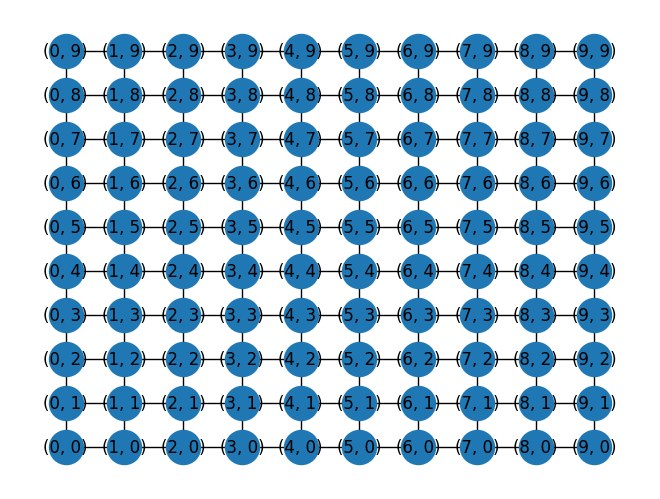

In [ ]:
# Cell automata structure: live in a grid
# Each cell with its kneigborhood
# A grid is regular graph
import networkx as nx
grid_size = 10

G = nx.grid_2d_graph(grid_size, grid_size)
pos = {(x,y): (x, y) for x,y in G.nodes()}

nx.draw(G, pos=pos, with_labels=True, node_size=600)

In [ ]:
a = np.random.random(size=(grid_size, grid_size))*120
a

array([[ 85.24925215,  84.585389  ,  23.55263219,  85.14953546,
         74.45064218,  78.56931638,  19.27840787, 109.14179763,
         98.87835243,   9.09526454],
       [ 75.96526457,   0.24582376,  59.97594038, 117.64498793,
         77.85926862,  58.53930814,  57.17113353, 105.60818385,
         98.54964762, 105.41388297],
       [ 62.81928056,  89.64891118,  41.55267462, 106.94082946,
         34.98656501,  58.07582205,  52.30380161,  53.33195465,
         64.48331842,  76.69227386],
       [ 13.54523898,  39.75053041,  73.08758204, 118.34294015,
          2.96700603,  78.01776193,  65.33385245,  23.04042944,
         33.69254858,  53.82688572],
       [ 86.49929549,  52.4105398 ,  22.55626757, 102.48903487,
         80.28271185,  51.51128078,  51.31359192,  30.61610471,
         62.85838866,  21.49703656],
       [107.5517957 , 110.17499069,   4.22269917,  50.35037426,
        114.49950877,  53.45384194, 117.02900109,  81.08834767,
         52.53551195,  40.77325905],
       [ 9

In [ ]:
g = 0.17
# iterate for a given time 
neuron_i = (5,5)  # iterate for all neurons
for v in list(G.neighbors(neuron_i)):
    local_field = a[v] - a[neuron_i]  # influencia del vecindario en a_(t-1)
a[neuron_i] + local_field*g

64.2616189996997

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>